In [1]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('outputnew.csv')

In [3]:
df = df.drop_duplicates()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3362 entries, 0 to 3561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gold            3362 non-null   int64  
 1   Level           3362 non-null   float64
 2   Minions         3362 non-null   int64  
 3   Jungle_minions  3362 non-null   int64  
 4   Kills           3362 non-null   int64  
 5   Assists         3362 non-null   int64  
 6   Deaths          3362 non-null   int64  
 7   Plates          3362 non-null   int64  
 8   Towers          3362 non-null   int64  
 9   Dragons         3362 non-null   int64  
 10  Heralds         3362 non-null   int64  
 11  Sight_wards     3362 non-null   int64  
 12  Control_wards   3362 non-null   int64  
 13  Gold_diff       3362 non-null   int64  
 14  Win             3362 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 420.2 KB


In [5]:
df

,Gold,Level,Minions,Jungle_minions,Kills,Assists,Deaths,Plates,Towers,Dragons,Heralds,Sight_wards,Control_wards,Gold_diff,Win
0,24501,8.8,315,57,11,8,6,6,1,1,1,12,2,1825,0
1,22676,8.8,352,67,6,2,11,5,1,0,0,16,1,-1825,1
2,27648,9.0,289,80,17,11,17,7,0,1,1,15,2,1446,1
3,26202,8.8,270,76,17,17,17,1,0,0,0,17,4,-1446,0
4,23201,8.6,293,47,9,7,9,4,0,0,1,18,1,-739,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,26706,8.8,382,82,11,9,7,5,1,2,0,23,5,3799,1
3558,27001,9.2,337,82,14,13,10,1,0,0,0,22,7,694,0
3559,26307,9.4,372,78,10,9,14,6,0,1,0,25,5,-694,1
3560,23749,7.8,255,10,11,6,6,10,2,0,0,10,1,6816,1


Text(0.5, 1.0, 'Correlation Heatmap')

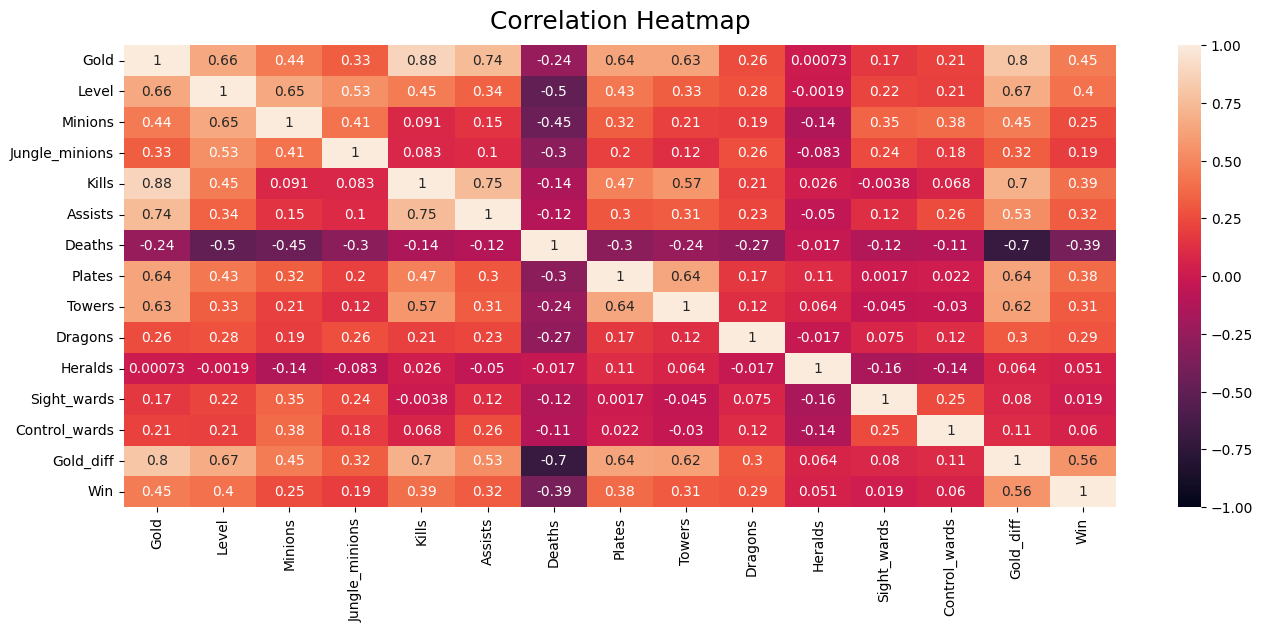

In [6]:
#Generate correlation matrix in orther to see most important values
corr = df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

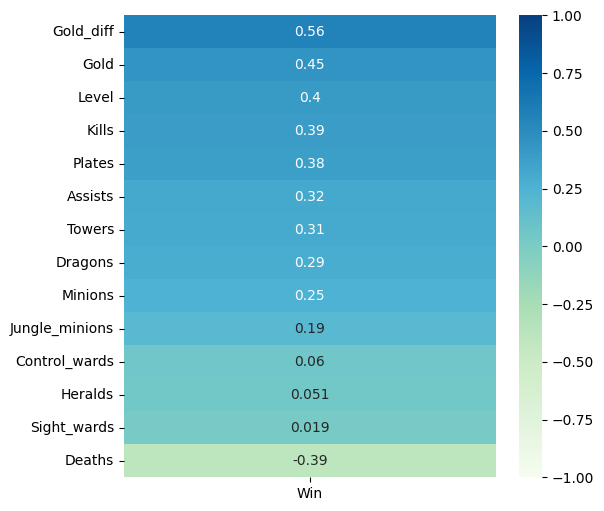

In [7]:
#Generate correlation matrix only of win column
fig, ax = plt.subplots(figsize=((6, 6)))
sns.heatmap(corr["Win"].sort_values(ascending=False).drop("Win").to_frame(), vmin=-1, vmax=1, annot=True,cmap="GnBu")
plt.show()

In [8]:
# Create functions to facilitate scaling, fiting and evaluating multiple 
# dataframes.

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 
    """
    Displays evaluation metrics including classification report, confusion
    matrix, ROC-AUC curve.
    
    If the argument 'params' is passed, will display a table of the 
    parameters hyperparameters used in the model.

    Args:
        df (DataFrame) : DataFrame with features to check multicollinearity on.
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
    """
        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    ConfusionMatrixDisplay.from_estimator(model, X_test,
                          y_test,normalize='true',
                         cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    RocCurveDisplay.from_estimator(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):
    """
    Fits model on training data and displays classification evaluation metrics.

    Args:
        model (classifier object) : Type of classificatier model to use.
        X_train (DataFrame) : Training data with feature variables.
        y_train (Series) : Training data with target variable.
        X_test (DataFrame) : Testing data with feature variables.
        y_test (Series) : Testing data with target variable.
        digits (int) : Colormap to display correlation range. Default is 4.
        figsize (int, int) : Figure dimensions. Default is (10,5)
        params (bool) : Prints table of hyperparameters used in model.
        
    Returns:
        model (classifier object) : Model after fitting on training data.
    """
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

In [9]:
#We will first set the complete DataFrame and reduced DataFrames
x_keep_original = ['Level', 'Minions', 'Jungle_minions', 'Kills', 'Assists',	'Deaths', 'Plates',	'Towers', 'Dragons', 'Heralds', 'Sight_wards', 'Control_wards', 'Gold_diff']
X_original = df[x_keep_original]
y_original = df["Win"]

x_keep_reduced = ['Level', 'Minions', 'Jungle_minions',	'Kills', 'Assists',	'Deaths', 'Towers', 'Dragons', 'Heralds', 'Gold_diff']
X_reduced = df[x_keep_reduced]
y_reduced = df["Win"]

In [10]:
#Do the split for both the orginal and reduced DataFrames
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.33, random_state=42)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.33, random_state=42)

C:\Users\admin\anaconda3\envs\py39env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7710    0.7798    0.7754      1140
           1     0.7716    0.7626    0.7671      1112

    accuracy                         0.7713      2252
   macro avg     0.7713    0.7712    0.7712      2252
weighted avg     0.7713    0.7713    0.7713      2252

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7598    0.7542    0.7570       541
           1     0.7679    0.7733    0.7706       569

    accuracy                         0.7640      1110
   macro avg     0.7638    0.7637    0.7638      1110
weighted avg     0.7639    0.7640    0.7639      1110

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


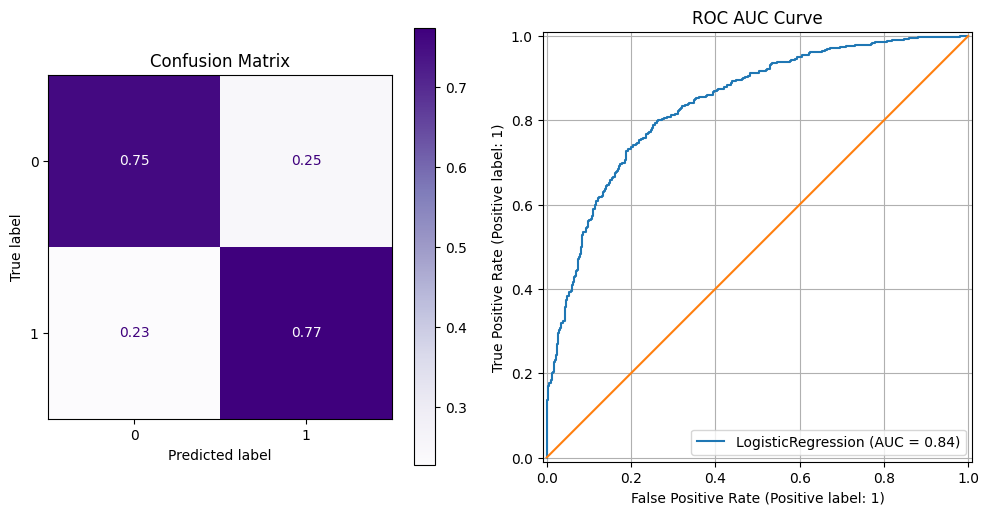

In [11]:
#Logisitc regression using the original df
log_select = fit_eval(LogisticRegression(), X_train_original, y_train_original, X_test_original, y_test_original)

C:\Users\admin\anaconda3\envs\py39env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7728    0.7816    0.7771      1140
           1     0.7734    0.7644    0.7689      1112

    accuracy                         0.7731      2252
   macro avg     0.7731    0.7730    0.7730      2252
weighted avg     0.7731    0.7731    0.7731      2252

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7618    0.7449    0.7533       541
           1     0.7625    0.7786    0.7704       569

    accuracy                         0.7622      1110
   macro avg     0.7621    0.7617    0.7619      1110
weighted avg     0.7622    0.7622    0.7621      1110

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


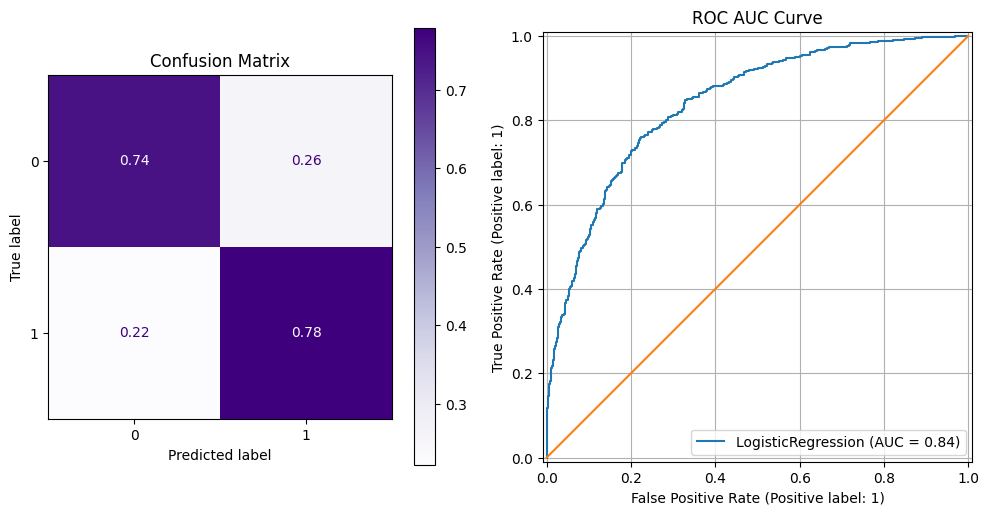

In [12]:
#Logisitc regression using the reduced df
log_select = fit_eval(LogisticRegression(), X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1140
           1     1.0000    1.0000    1.0000      1112

    accuracy                         1.0000      2252
   macro avg     1.0000    1.0000    1.0000      2252
weighted avg     1.0000    1.0000    1.0000      2252

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.6568    0.6969    0.6762       541
           1     0.6940    0.6538    0.6733       569

    accuracy                         0.6748      1110
   macro avg     0.6754    0.6753    0.6748      1110
weighted avg     0.6759    0.6748    0.6747      1110

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


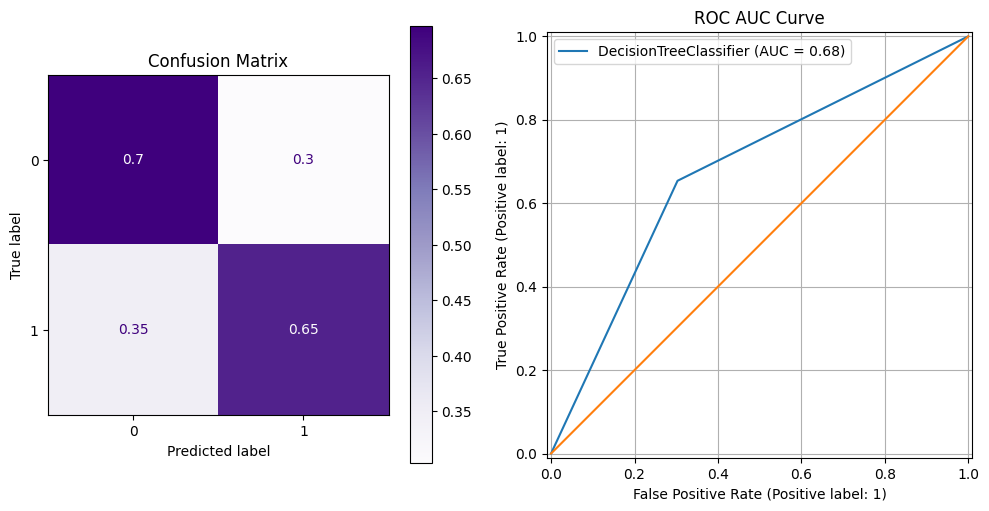

In [13]:
#Decision Tree using the original df
log_select = fit_eval(DecisionTreeClassifier(), X_train_original, y_train_original, X_test_original, y_test_original)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1140
           1     1.0000    1.0000    1.0000      1112

    accuracy                         1.0000      2252
   macro avg     1.0000    1.0000    1.0000      2252
weighted avg     1.0000    1.0000    1.0000      2252

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.6543    0.6543    0.6543       541
           1     0.6714    0.6714    0.6714       569

    accuracy                         0.6631      1110
   macro avg     0.6628    0.6628    0.6628      1110
weighted avg     0.6631    0.6631    0.6631      1110

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


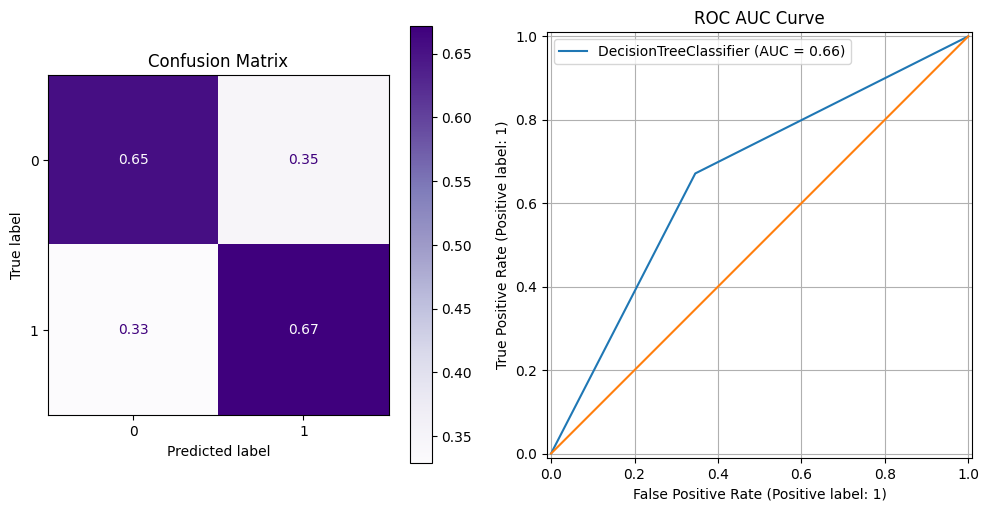

In [14]:
#Decision Tree using the reduced df
log_select = fit_eval(DecisionTreeClassifier(), X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1140
           1     1.0000    1.0000    1.0000      1112

    accuracy                         1.0000      2252
   macro avg     1.0000    1.0000    1.0000      2252
weighted avg     1.0000    1.0000    1.0000      2252

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7337    0.7486    0.7411       541
           1     0.7563    0.7417    0.7489       569

    accuracy                         0.7450      1110
   macro avg     0.7450    0.7451    0.7450      1110
weighted avg     0.7453    0.7450    0.7451      1110

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


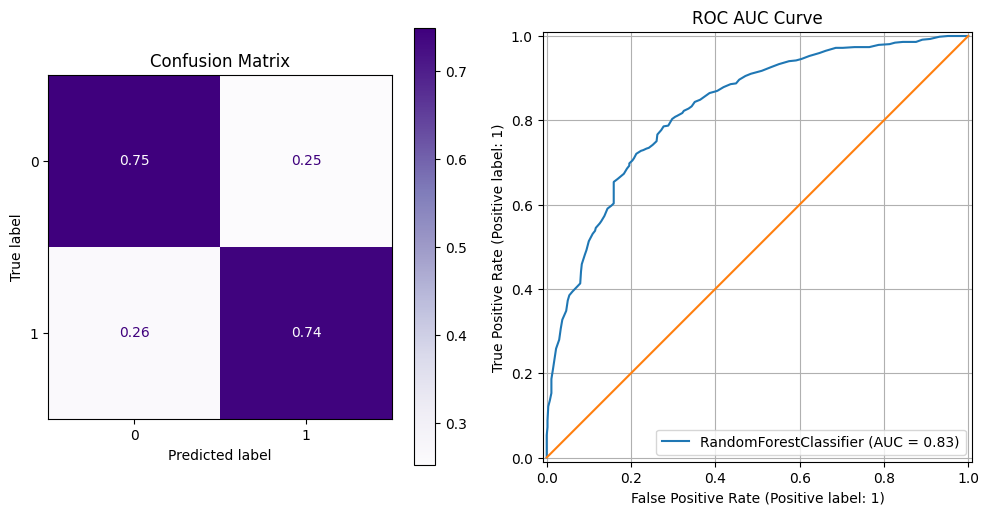

In [15]:
#Random Forest using the original df
log_select = fit_eval(RandomForestClassifier(), X_train_original, y_train_original, X_test_original, y_test_original)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1140
           1     1.0000    1.0000    1.0000      1112

    accuracy                         1.0000      2252
   macro avg     1.0000    1.0000    1.0000      2252
weighted avg     1.0000    1.0000    1.0000      2252

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7399    0.7468    0.7433       541
           1     0.7571    0.7504    0.7538       569

    accuracy                         0.7486      1110
   macro avg     0.7485    0.7486    0.7485      1110
weighted avg     0.7487    0.7486    0.7487      1110

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


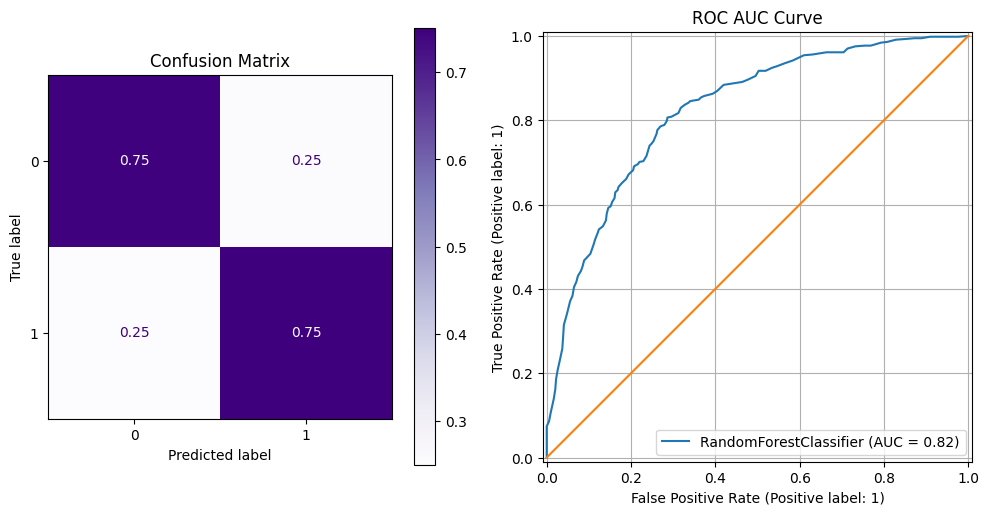

In [16]:
#Random Forest using the reduced df
log_select = fit_eval(RandomForestClassifier(), X_train_reduced, y_train_reduced, X_test_reduced, y_test_reduced)